# Project 1
---

### Analysis

- Here is where the analysis will be.

## Setup
--------

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Import master data file
master_data_df = pd.read_csv("data.csv")
master_data_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Limit years for cleaned data to 2006-2015
cleaned_data_df = master_data_df [["Country Name", "Indicator Name", "2006", "2007", "2008", '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Limit countries for cleaned data to 10 largest in the world
cleaned_data_df = cleaned_data_df .loc[(cleaned_data_df ["Country Name"] == "China") |
                     (cleaned_data_df ["Country Name"] == "India") |
                     (cleaned_data_df ["Country Name"] == "United States") |
                     (cleaned_data_df ["Country Name"] == "Indonesia") |
                     (cleaned_data_df ["Country Name"] == "Brazil") |
                     (cleaned_data_df ["Country Name"] == "Pakistan") |
                     (cleaned_data_df ["Country Name"] == "Nigeria") |
                     (cleaned_data_df ["Country Name"] == "Bangladesh") |
                     (cleaned_data_df ["Country Name"] == "Russian Federation") |
                     (cleaned_data_df ["Country Name"] == "Mexico")
                     , :]

# Limit indicators to those relevant for planned analysis
cleaned_data_df = cleaned_data_df .loc[(cleaned_data_df ["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Population, total") |
                     (cleaned_data_df ["Indicator Name"] == "Population, male") |
                     (cleaned_data_df ["Indicator Name"] == "Population, female") |
                     (cleaned_data_df ["Indicator Name"] == "Urban population") |
                     (cleaned_data_df ["Indicator Name"] == "Rural population") |
                     (cleaned_data_df ["Indicator Name"] == "Physicians (per 1,000 people)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight (% of adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight, male (% of male adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight, female (% of female adults)")
                     , :]

# Display cleaned dataframe
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
19505,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN


In [4]:
# Sorting dataframe
cleaned_data_df = cleaned_data_df.reset_index(drop=True)
cleaned_data_df.index.name = "Index"
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Index,,,,,,,,,,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN


In [5]:
column_averages = cleaned_data_df[["2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]].mean(axis = 1, skipna = True)
column_averages_df = pd.DataFrame(column_averages)
column_averages_df=column_averages_df.rename(columns = {0:"2006-2015 AVG"})
column_averages_df.index.name = "Index"
column_averages_df.head(1)

,2006-2015 AVG
Index,
0,120.919333


In [6]:
cleaned_data_df = pd.merge(cleaned_data_df,column_averages_df, on = "Index", how = "inner")
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2006-2015 AVG
Index,,,,,,,,,,,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN,120.919333


In [7]:
cleaned_data_df = cleaned_data_df [["Country Name","Indicator Name", "2006-2015 AVG"]]
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
Index,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",120.919333


In [8]:
# Calculate Total Average Mortality Rates
countries = cleaned_data_df["Country Name"].unique().astype(str)
country_list = []
total_avg_mort = []
for country in countries:

    country_df = cleaned_data_df.loc[cleaned_data_df["Country Name"] == country, :]
    total_mort = country_df.loc[(country_df["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") | (country_df["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") , "2006-2015 AVG"].sum()
    
    country_list.append(country)
    total_avg_mort.append(total_mort)


In [9]:
# Create Dataframe for Total Average Mortality Rates
total_avg_mort_df = pd.DataFrame({
    "Country Name" : country_list,
    "Indicator Name" : "Mortality Rate, Total",
    "2006-2015 AVG" : total_avg_mort,
    })
total_avg_mort_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [10]:
# Combine cleaned_data_df and total_avg_mort_df ?
cleaned_data_df = cleaned_data_df.append(total_avg_mort_df,ignore_index=True)
cleaned_data_df.head(1)

C:\Users\chave\AppData\Local\Temp\ipykernel_16480\3816953656.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_data_df = cleaned_data_df.append(total_avg_mort_df,ignore_index=True)


,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",120.919333


In [11]:
# Sort data
cleaned_data_df = cleaned_data_df.sort_values(["Country Name", "Indicator Name"], ascending =True)
cleaned_data_df = cleaned_data_df.reset_index(drop=True)
cleaned_data_df

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",2.800159e+02
1,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",1.209193e+02
2,Bangladesh,"Mortality rate, adult, male (per 1,000 male ad...",1.590966e+02
3,Bangladesh,"Physicians (per 1,000 people)",3.137500e-01
4,Bangladesh,"Population, female",7.543719e+07
...,...,...,...
115,United States,Prevalence of overweight (% of adults),6.640000e+01
116,United States,"Prevalence of overweight, female (% of female ...",6.170000e+01
117,United States,"Prevalence of overweight, male (% of male adults)",7.120000e+01
118,United States,Rural population,5.935318e+07


In [12]:
# Export cleaned data to CSV
cleaned_data_df.to_csv("cleaned_data.csv", index=False)

In [13]:
# Read cleaned data csv
final_cleaned_df = pd.read_csv("cleaned_data.csv")
final_cleaned_df

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",2.800159e+02
1,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",1.209193e+02
2,Bangladesh,"Mortality rate, adult, male (per 1,000 male ad...",1.590966e+02
3,Bangladesh,"Physicians (per 1,000 people)",3.137500e-01
4,Bangladesh,"Population, female",7.543719e+07
...,...,...,...
115,United States,Prevalence of overweight (% of adults),6.640000e+01
116,United States,"Prevalence of overweight, female (% of female ...",6.170000e+01
117,United States,"Prevalence of overweight, male (% of male adults)",7.120000e+01
118,United States,Rural population,5.935318e+07


## Analysis
--------

#### Mortality Rate and Sex
--------

In [14]:
# Create bar chart with mortality rate as y-axis and each of the sexes as a bar across all nations

In [15]:
#Create dataframe to run visualization on
gender_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Population, female") |
(final_cleaned_df["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") |
(final_cleaned_df["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") |
(final_cleaned_df["Indicator Name"] == "Population, male") |
(final_cleaned_df["Indicator Name"] == "Population, total")
,:]
gender_df

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",2.800159e+02
1,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",1.209193e+02
2,Bangladesh,"Mortality rate, adult, male (per 1,000 male ad...",1.590966e+02
4,Bangladesh,"Population, female",7.543719e+07
5,Bangladesh,"Population, male",7.727287e+07
6,Bangladesh,"Population, total",1.527101e+08
12,Brazil,"Mortality Rate, Total",3.080899e+02
13,Brazil,"Mortality rate, adult, female (per 1,000 femal...",1.008477e+02
14,Brazil,"Mortality rate, adult, male (per 1,000 male ad...",2.072422e+02
16,Brazil,"Population, female",1.012362e+08


In [16]:
# Create country column
countires =[]
countries = gender_df["Country Name"].unique().astype(str)
sorted_gender_df = pd.DataFrame(countries)
sorted_gender_df=sorted_gender_df.rename(columns = {0:"Country"})
sorted_gender_df.index.name = "Index"
sorted_gender_df.head

<bound method NDFrame.head of                   Country
Index                    
0              Bangladesh
1                  Brazil
2                   China
3                   India
4               Indonesia
5                  Mexico
6                 Nigeria
7                Pakistan
8      Russian Federation
9           United States>

In [17]:
# Create mortality column
mort_rates = gender_df.loc[gender_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']

mort_rates_df = pd.DataFrame(mort_rates)
mort_rates_df = mort_rates_df.reset_index(drop=True)
mort_rates_df = mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
mort_rates_df.index.name = "Index"
mort_rates_df.head()

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889
1,308.089889
2,182.676556
3,386.059222
4,367.283111


In [18]:
# Create total population column
total_pop = gender_df.loc[gender_df["Indicator Name"] == "Population, total", '2006-2015 AVG']

total_pop_df = pd.DataFrame(total_pop)
total_pop_df = total_pop_df.reset_index(drop=True)
total_pop_df = total_pop_df.rename(columns = {"2006-2015 AVG":"Average Total Population"})
total_pop_df.index.name = "Index"
total_pop_df.head(1)

,Average Total Population
Index,
0,152710055.9


In [19]:
#Create female average mortality column
female_mort_rates = gender_df.loc[gender_df["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)", '2006-2015 AVG']
female_mort_rates_df = pd.DataFrame(female_mort_rates)
female_mort_rates_df = female_mort_rates_df.reset_index(drop=True)
female_mort_rates_df = female_mort_rates_df.rename(columns = {"2006-2015 AVG":"Female Average Mortality Rate (Per 1,000 Female Adults)"})
female_mort_rates_df.index.name = "Index"
female_mort_rates_df.head ()

,"Female Average Mortality Rate (Per 1,000 Female Adults)"
Index,
0,120.919333
1,100.847667
2,77.372444
3,159.595667
4,154.537111


In [20]:
# Create female population column
female_pop = gender_df.loc[gender_df["Indicator Name"] == "Population, female", '2006-2015 AVG']

female_pop_df = pd.DataFrame(female_pop)
female_pop_df = female_pop_df.reset_index(drop=True)
female_pop_df = female_pop_df.rename(columns = {"2006-2015 AVG":"Average Female Population"})
female_pop_df.index.name = "Index"
female_pop_df.head ()


,Average Female Population
Index,
0,75437187.5
1,101236236.7
2,650658233.0
3,596177211.2
4,120783195.5


In [21]:
#Create male average mortality column

male_mort_rates = gender_df.loc[gender_df["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)", '2006-2015 AVG']
male_mort_rates_df = pd.DataFrame(male_mort_rates)
male_mort_rates_df = male_mort_rates_df.reset_index(drop=True)
male_mort_rates_df = male_mort_rates_df.rename(columns = {"2006-2015 AVG":"Male Average Mortality Rate (Per 1,000 Male Adults)"})
male_mort_rates_df.index.name = "Index"
male_mort_rates_df.head ()

,"Male Average Mortality Rate (Per 1,000 Male Adults)"
Index,
0,159.096556
1,207.242222
2,105.304111
3,226.463556
4,212.746000


In [22]:
# Create male population column
male_pop = gender_df.loc[gender_df["Indicator Name"] == "Population, male", '2006-2015 AVG']

male_pop_df = pd.DataFrame(male_pop)
male_pop_df = male_pop_df.reset_index(drop=True)
male_pop_df = male_pop_df.rename(columns = {"2006-2015 AVG":"Average Male Population"})
male_pop_df.index.name = "Index"
male_pop_df.head()


,Average Male Population
Index,
0,77272868.4
1,98230956.8
2,690363767.0
3,641911521.3
4,122530088.7


In [23]:
# Combine colums into sorted_gender_df for Overall Adult Male & Female
sorted_gender_df = pd.merge(sorted_gender_df,female_mort_rates_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,male_mort_rates_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,mort_rates_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,total_pop_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,female_pop_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,male_pop_df, on = "Index", how = "inner")
sorted_gender_df.head()

,Country,"Female Average Mortality Rate (Per 1,000 Female Adults)","Male Average Mortality Rate (Per 1,000 Male Adults)","Average Mortality Rate (Per 1,000 Adults)",Average Total Population,Average Female Population,Average Male Population
Index,,,,,,,
0,Bangladesh,120.919333,159.096556,280.015889,1.527101e+08,75437187.5,77272868.4
1,Brazil,100.847667,207.242222,308.089889,1.994672e+08,101236236.7,98230956.8
2,China,77.372444,105.304111,182.676556,1.341022e+09,650658233.0,690363767.0
3,India,159.595667,226.463556,386.059222,1.238089e+09,596177211.2,641911521.3
4,Indonesia,154.537111,212.746000,367.283111,2.433133e+08,120783195.5,122530088.7


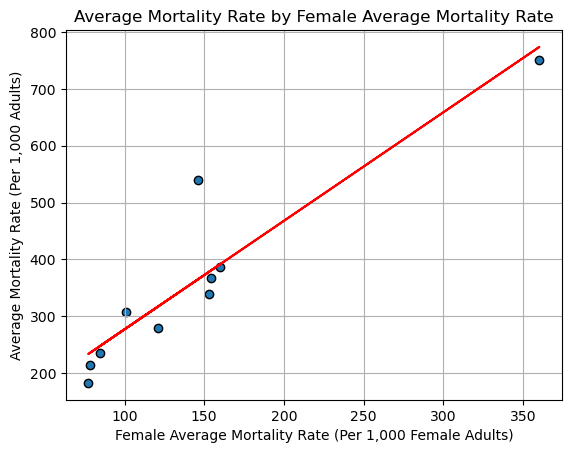

In [25]:
# Plot Average Mortality Rate by Female Average Mortality Rate (Per 1,000 Female Adults)
x_values = sorted_gender_df ["Female Average Mortality Rate (Per 1,000 Female Adults)"]
y_values = sorted_gender_df ["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Female Average Mortality Rate")
plt.xlabel ("Female Average Mortality Rate (Per 1,000 Female Adults)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(22,650),color="red")
plt.annotate(f'r = {rvalue}',(22,610),color="r")

# Save the figure
plt.savefig("output_figs/Female Average Mortality Rate.png")

# Display the figure
plt.show()

#### Mortality Rate and Urbanization
--------

In [ ]:
# Create bar chart with mortality rate as y-axis and urban and rural populations as bars across all nations

In [ ]:
# Create dataframe to run visualization on
urban_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Rural population") |
(final_cleaned_df["Indicator Name"] == "Urban population") |
(final_cleaned_df["Indicator Name"] == "Population, total")
,:]
urban_df.head(1)

In [ ]:
# Create country column
countires =[]
countries = urban_df["Country Name"].unique().astype(str)
sorted_urban_df = pd.DataFrame(countries)
sorted_urban_df=sorted_urban_df.rename(columns = {0:"Country"})
sorted_urban_df.index.name = "Index"
sorted_urban_df.head(1)

In [ ]:
# Create mortality column
mort_rates = urban_df.loc[urban_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']

mort_rates_df = pd.DataFrame(mort_rates)
mort_rates_df = mort_rates_df.reset_index(drop=True)
mort_rates_df = mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
mort_rates_df.index.name = "Index"
mort_rates_df.head(1)

In [ ]:
# Create total population column
total_pop = urban_df.loc[urban_df["Indicator Name"] == "Population, total", '2006-2015 AVG']

total_pop_df = pd.DataFrame(total_pop)
total_pop_df = total_pop_df.reset_index(drop=True)
total_pop_df = total_pop_df.rename(columns = {"2006-2015 AVG":"Average Total Population"})
total_pop_df.index.name = "Index"
total_pop_df.head(1)

In [ ]:
# Create urban population column
urban_pop = urban_df.loc[urban_df["Indicator Name"] == "Urban population", '2006-2015 AVG']

urban_pop_df = pd.DataFrame(urban_pop)
urban_pop_df = urban_pop_df.reset_index(drop=True)
urban_pop_df = urban_pop_df.rename(columns = {"2006-2015 AVG":"Average Urban Population"})
urban_pop_df.index.name = "Index"
urban_pop_df.head(1)

In [ ]:
# Create rural population column
rural_pop = urban_df.loc[urban_df["Indicator Name"] == "Rural population", '2006-2015 AVG']

rural_pop_df = pd.DataFrame(rural_pop)
rural_pop_df = rural_pop_df.reset_index(drop=True)
rural_pop_df = rural_pop_df.rename(columns = {"2006-2015 AVG":"Average Rural Population"})
rural_pop_df.index.name = "Index"
rural_pop_df.head(1)

In [ ]:
# Combine colums into sorted_urban_df
sorted_urban_df = pd.merge(sorted_urban_df,mort_rates_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,total_pop_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,urban_pop_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,rural_pop_df, on = "Index", how = "inner")
sorted_urban_df

In [ ]:
# Plot Average Mortality Rate by Country
x_values = sorted_urban_df["Country"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.bar(x_values,y_values)
plt.title ("Average Mortality Rate (Per 1,000 Adults) by Country")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.xticks(x_values,x_values, rotation=90)

plt.show

In [ ]:
# Plot Average Mortality Rate by Average Total Population
x_values = sorted_urban_df["Average Total Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Total Population")
plt.xlabel ("Average Total Population (In Billions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(600000000,250),color="red")
plt.annotate(f'r = {rvalue}',(600000000, 200),color="r")

plt.show

In [ ]:
# Plot Average Mortality Rate by Average Urban Population
x_values = sorted_urban_df["Average Urban Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Urban Population")
plt.xlabel ("Average Urban Population (In Hundred-Millions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(400000000,700),color="red")
plt.annotate(f'r = {rvalue}',(400000000, 650),color="r")

plt.show

In [ ]:
# Plot Average Mortality Rate by Average Rural Population
x_values = sorted_urban_df["Average Rural Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Rural Population")
plt.xlabel ("Average Rural Population (In Hundred-Millions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(400000000,700),color="red")
plt.annotate(f'r = {rvalue}',(400000000, 650),color="r")

plt.show

#### Mortality Rate and Access to Physicians
--------

In [ ]:
# Create scatterplot with mortality rate as y-axis and pysicians (per 1000 people) as the x-axis across all nations

#### Mortality Rate and Obesity
--------

In [ ]:
# Create scatterplot with mortality rate as y-axis and prevalence of overweight (% of adults) as the x-axis across all nations